# Decision Tree Tutorial


A **decision tree** is a logic structure composed of connected **nodes**. Data enters at the **root** of the tree, and logical decisions are made about that data at each node. These trees are simple concepts and easy to grasp, which is a benefit for operational use.

By making our way down the decision tree, we can apply classifiers to data. In the diagram below, the input data are "job offers," and we are classifying each offer as "accept" or "decline."

![decision_tree.png](https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Images/decision_tree.png)

Everything starts at the top of the decision tree from the **root node**.
* Each of the internal **decision nodes** asks a question about the data and determines which branch to continue down. Notice that all decisions must result in a logical "yes" or "no."
  *  Ex. Instead of asking how long a commute time is, ask if it was over 1 hour.
* Each **branch** (line) denotes the outcome of a test (yes/no).
* Finally, the data reaches an end, or a **leaf node**, which contains a classification label.

Another thing you may notice is that while all data must pass through the root node, only a fraction will end up passing through decisions further down the tree. For this reason, it is best to have the more "determinative" nodes higher in the tree where more data will pass through.

This is particularly important for trees generated by machine learning, where some paths may lead to innaccurate classifications. A good algorithm for generating decision trees will order nodes based on **confidence**, which tells us how certain the model is that it predicts the right class at a particular node. If a node can accurately divide a large portion of the training data, that node should be placed close to the root.

In the following sections, we will take a look at some other important considerations for generating decision trees with machine learning.

## Important Parameters for Decision Tree

* Feature selection
* Maximum depth
* Minimum samples leaf

### Feature Selection Methods
---

Feature selection methods determine which feature to consider, or "ask a question about," at each node. The goal is to chose the feature that will best divide the data at a given point in the tree.

Two common methods for this are the **Gini Index** and **Entropy.** In practice, you can try both methods and see which performs better!

#### Gini Index
The **Gini Index**, or Impurity, measures the probability of a random data point being misclassified when randomly chosen. The degree of Gini Index has a range of [0, 0.5] where:
- **'0'** indicates that all data belong to a single class or there exists only one class (highest level of purity)
- **'0.5'** indicates an equal distribution of data into various classes (maximum impurity)

Its definition is as follows:

$$Gini = 1-\sum_{i=1}^{C}(p_{i})^2$$

where $p_{i}$ is the probability of class $i$, and $C$ is the total number of classes.

For each possible branch (or "question" you are thinking of "asking"), we square the probability of each class outcome and subtract the sum of these squares from 1.

Gini Index aims to split data into different branches in a way that decreases the impurities from the root to the leaf nodes. Generally speaking, this measure will favor larger partitions of data.

#### Entropy
**Entropy**, which may be familiar from Physics or Chemistry class, is a measure of disorder and impurity in a node. Unlike the Gini Index, this value ranges from 0 to 1: leaf nodes with all instances belonging to one class have an entropy of 0, and nodes where the classes are divided equally has an entropy of 1.

The definition of entropy is as follows:

$$Entropy = \sum_{i=1}^{C}-p_{i}*\log_{2}(p_{i})$$

where $p_{i}$ is the probability of class $i$, and $C$ is the total number of classes.

As with Gini Index, the entropy value is calculated for each possible branch, and the lowest value is favorable for any particular node.

Compared to Gini Index, entropy will favor smaller splits with many unique values.

### Maximum Depth
---

The depth of a node is calculated as its distance from the root. The maximum depth is thus the depth of the node that is furthest from the root, and the furthest node will always be a leaf node.

![dt1.png](https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Images/dt1.png)

When generating a tree, most algorithms will allow you to set a maximum depth—and you should! If you don't, the questions may become very specific to the training data and lead to an overfit.

**Overfitting** is when a machine learning algorithm has become too specific to the training set. For example, a decision tree could have so many nodes that each piece of data in the training set will end at its own, unique leaf. Unless each new datum the model encounters is identical to one from the training set, such a tree would yield inaccurate results. While not always this extreme, decision trees have a tendency to overfit thanks to the granular nature of decision nodes.

Hence, by setting a maximum depth, we force the tree to look for more general questions so that each node will take on a greater share of determinations. This approach will then produce a model that is more **robust** to new test data.

### Minimum Samples Leaf
---

This is the minimum number of samples required to be at a leaf node. Similar to maximum depth, the main goal for the `min_samples_leaf` parameter is to prevent overfitting.

The number of **samples** for a given leaf is the number of individual data points that reach the leaf in training. In an overfitted tree, some leaf nodes may be specific to only a few pieces of training data. We have low confidence that such a model will be accurate for new test data. By setting a number for minimum samples, we can remove leaf nodes that suffer from overfitting.

# Random Forests

Another approach to reducing overfit is to introduce **randomness**. This means giving more or less weight to certain decision nodes than what the training set alone would suggest.

A single tree generated with randomness is likely to have a few nodes that are very inaccurate. However, it is also less likely to overfit to the training data. In order to balance out the worst offenders from randomizing, a good practice is to generate multiple random trees and average the results. This group of random trees is called a **random forest.**

![random_forest.png](https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Images/random_forest.png)

New input is run down all the trees and then combined by some method. This method could be a simple majority vote, an average probability, or some other solution.

# Example Decision Tree

In [ ]:
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 11.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import graphviz
import matplotlib.pyplot as plt

### Loading and Splitting Data

In [ ]:
url = "https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Week1/diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names)

# Dropping NaN rows
invalid = ['plas', 'pres', 'skin', 'test', 'mass']

for i in invalid:
    data[i].replace(to_replace=0, value=np.nan, inplace=True)
    
data = data.dropna(axis=0).reset_index(drop=True)
data.head()

# Splitting data
X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
y_col = 'class'

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)

### Creating the Model

Notice the use of the "criterion" argument to set the feature selection method to `"entropy"`. Another option for this argument is `"gini"`. We are also setting the maximum depth and minimum sample leafs both to 5.

In [ ]:
# Creating a model with sklearn's decision DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                              max_depth=5, min_samples_leaf=5)  # minimum number of samples a leaf must have

# Training/Fitting the model with training data
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)

### Evaluating the Model

In [ ]:
# Printing accuracy of testing & training data
y_train_pred=decision_tree.predict(X_train)
print("Training Accuracy is", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=decision_tree.predict(X_val)
print("Validation Accuracy is", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is 84.8
Validation Accuracy is 77.77777777777779


### Using Graphiz to visualize tree

**Graphviz** is a Python package specifically designed to visualize graphs. Here we are using the mathematical definition of "graph," which is a structure of vertices connected with edges. It turns out that the node-and-branch structure of a tree is a type of graph!

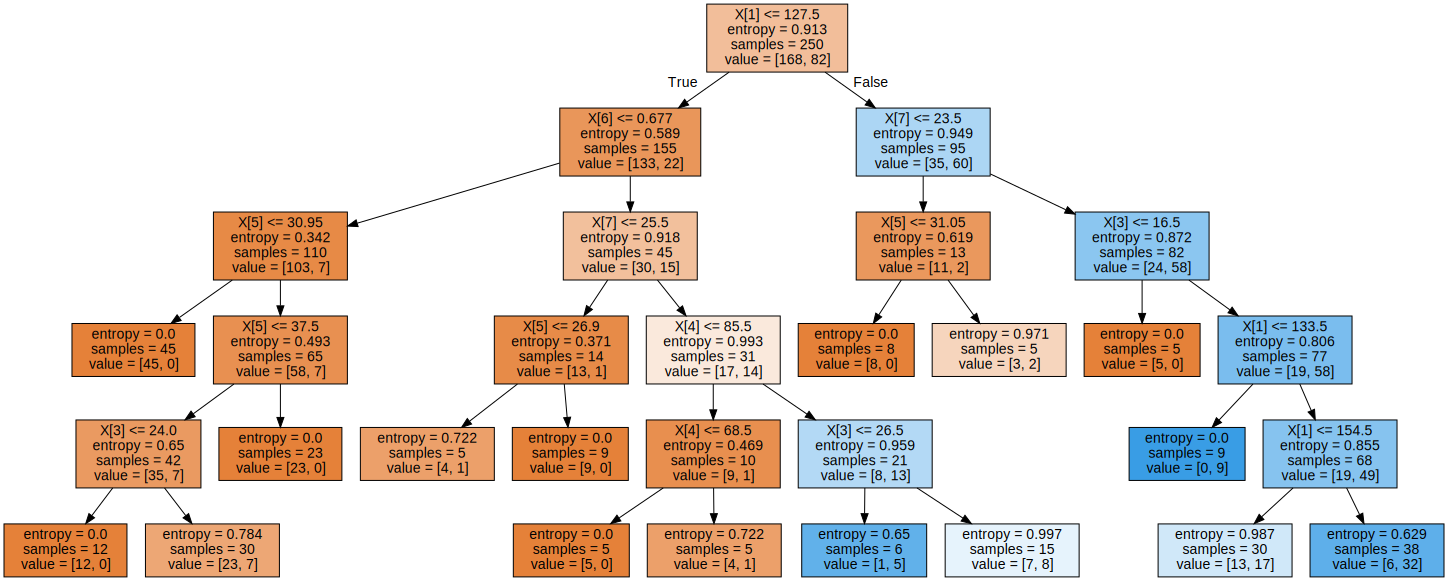

In [ ]:
dot_data = tree.export_graphviz(decision_tree, out_file=None, filled=True)

graph = graphviz.Source(dot_data)
graph

# Example Random Forest

### Creating the Model

Although not shown here, the normal `DecisionTree` parameters can also be applied here.

In [ ]:
# Creating a model with sklearn's RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)

# Training/Fitting the model with training data
random_forest.fit(X_train, y_train)

RandomForestClassifier()

### Evaluating the Model

In [ ]:
# Printing accuracy of testing & training data
y_train_pred=random_forest.predict(X_train)
print("Training Accuracy is", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=random_forest.predict(X_val)
print("Validation Accuracy is", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is 100.0
Validation Accuracy is 79.36507936507937


# Pros and Cons of Decision Trees
---

## Pros
- Easy to understand and interpret—perfect for visual representation
- Can work with numerical and categorical features

## Cons
- Tend to overfit

![trees.png](https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Images/trees.png)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=67231ff1-13ba-4f0b-99c2-0fe76b4d3844' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>